# Classification Trees

A classification tree is a predictive model that handles **categorical** responses, unlike a regression tree that deals with **continuous** ones. In a regression tree, the predicted response for an observation is the mean response of the training observations in the same terminal node. In contrast, for a classification tree, we predict that each observation belongs to the most common class among the training observations in its corresponding region. When interpreting the results of a classification tree, we are interested not only in the predicted class for a specific terminal node region, but also in the proportions of classes among the training observations in that region {cite:p}`james2023introduction`.

The process of developing a classification tree is similar to the approach used for constructing a regression tree. We use a technique called **recursive binary splitting** to build the classification tree. This technique involves repeatedly splitting the predictor space into two regions, such that the observations within each region are as similar as possible with respect to the response variable. The splitting process continues until a stopping criterion is met, such as a minimum node size or a maximum tree depth.

---

<font color='Blue'><b>Example:</b></font> Suppose we have a dataset with two classes, $A$ and $B$. Let's say that we want to build a classification tree to predict the class of a new observation based on two predictor variables, $X_{1}$ and $X_{2}$. We can use recursive binary splitting to build the tree as follows:

1. Start with the entire dataset and calculate the impurity of the response variable (i.e., the class labels). One common measure of impurity is the Gini impurity, which we discussed earlier.

2. For each predictor variable, $X_{1}$ and $X_{2}$, consider all possible split points and calculate the impurity of the resulting two groups of observations. Choose the split point that results in the lowest impurity.

3. Split the dataset into two groups based on the chosen split point and repeat steps 1 and 2 for each group.

4. Continue splitting the dataset recursively until a stopping criterion is met. This could be a minimum node size (i.e., the minimum number of observations in a terminal node), a maximum tree depth, or another criterion.

The resulting tree will have terminal nodes (i.e., leaves) that correspond to the predicted class labels. To predict the class of a new observation, we start at the root node of the tree and follow the appropriate branch based on the values of $X_{1}$ and $X_{2}$ until we reach a terminal node. The predicted class label is then the majority class of the training observations in that terminal node.

---

Recursive binary splitting is a straightforward and effective technique for constructing a classification tree. However, it can lead to overfitting, which occurs when the tree is too complex and fits the training data too closely, resulting in poor performance on new data. To prevent overfitting, some methods such as pruning, cross-validation, or regularization can be used to simplify the tree and improve its generalization ability {cite:p}`hothorn2006unbiased,james2023introduction`.

* **Classification Error Rate**: When dealing with classification tasks, the conventional criterion used in regression trees, known as the Residual Sum of Squares (RSS), is not suitable for guiding binary split decisions. Instead, a more appropriate option is the **classification error rate**. The main goal is to assign an observation in a specific region to the class that occurs most frequently among the training observations in that same region. The classification error rate measures the fraction of training observations in that region that do not belong to the most common class {cite:p}`james2023introduction`.

    Mathematically, the classification error rate ($E$) is defined as {cite:p}`sklearnUserGuide`:
    \begin{equation}
    E = 1 − \max_k (\hat{p}_{mk}),
    \end{equation}

    where,
    - $E$ stands for the classification error rate.
    - $\max_k$ denotes the maximum value over different classes ($k$).
    - $\hat{p}_{mk}$ represents the proportion of training observations in the mth region that belong to the kth class.
   
      
    ---
    
    <font color='Blue'><b>Example:</b></font> Suppose we have a dataset with three classes, $A$, $B$, and $C$. Let's say that we split the dataset into two nodes, $m1$ and $m2$. Node $m1$ contains 60% class A samples, 30% class $B$ samples, and 10% class $C$ samples, while node $m2$ contains 20% class $A$ samples, 50% class $B$ samples, and 30% class $C$ samples. Therefore, $\hat{p}_{m1} = 0.6$ and $\hat{p}_{m2} = 0.5$. 
    
    In the provided example, the calculation of the classification error ($E$) for the left and right nodes would be as follows:

    For the left node ($m1$):
    \begin{equation*}
    E_{\text{left}} = 1 - \max_k (\hat{p}_{\text{left}, mk}) = 1 - 0.6 = 0.4
    \end{equation*}
    
    For the right node ($m2$):
    \begin{equation*}
    E_{\text{right}} = 1 - \max_k (\hat{p}_{\text{right}, mk}) = 1 - 0.5 = 0.5
    \end{equation*}
    These values represent the classification error rates for the left and right nodes, respectively. They indicate the proportion of misclassified observations in each node. In this case, the left node has a classification error of 0.4 (40%), and the right node has a classification error of 0.5 (50%).

    ---
    
    However, it is important to note that the classification error rate is not very sensitive for effective tree growth. Therefore, practical experience has shown that two alternative measures are more useful in the tree-building process. These are the **Gini index** and the **cross-entropy**, which are both based on the concept of **impurity**. Impurity measures how often a randomly chosen observation from a region would be incorrectly classified. The Gini index and the cross-entropy are more responsive to changes in the node probabilities than the classification error rate, and thus lead to better splits {cite:p}`james2023introduction`.

* **Gini index:** The Gini index is formulated as follows {cite:p}`sklearnUserGuide`:
    \begin{equation}G = \sum_{k = 1}^{K} \hat{p}_{mk}(1 - \hat{p}_{mk}).\end{equation}

    This index serves as a metric to assess the overall variation among the K classes. Its calculation involves considering the proportions ($\hat{p}_{mk}$) of training observations belonging to the kth class in a particular region. A key point to note is that the Gini index takes lower values when the $\hat{p}_{mk}$ values are closer to either zero or one. This characteristic gives the Gini index its characterization as a measure of node purity. Specifically, when the Gini index is small, it indicates that a node mainly contains observations from a single class {cite:p}`james2023introduction`.
   
   ---
    
    <font color='Blue'><b>Example:</b></font> Suppose we have a dataset with two classes, $A$ and $B$. Let's say that class $A$ has 60% of the samples and class $B$ has 40% of the samples in node $m = 1$. We can calculate the Gini impurity as follows:

    \begin{equation*}
    G = \sum_{k = 1}^{K} \hat{p}_{mk}(1 - \hat{p}_{mk}) = \hat{p}_{m1}(1 - \hat{p}_{m1}) + \hat{p}_{m2}(1 - \hat{p}_{m2})
    \end{equation*}

    where $K$ is the number of classes, $m$ is the index of a class, and $\hat{p}_{mk}$ is the proportion of samples that belong to class $k$ in node $m$.

    \begin{align*}
    G & = \sum_{k = 1}^{2} \hat{p}_{1k}(1 - \hat{p}_{1k}) 
      \\ & = \hat{p}_{11}(1 - \hat{p}_{11}) + \hat{p}_{12}(1 - \hat{p}_{12}) 
      \\ & = 0.6(1 - 0.6) + 0.4(1 - 0.4) = 0.48
    \end{align*}

    There is an alternative way to calcualte this, using the following formula:
    \begin{equation} G = 1 - \sum_{k=1}^{K} p_{mk}^{2} \end{equation}

    \begin{align*}
    \text{Gini}(D) & = 1 - \sum_{k=1}^{2} p_{1k}^{2}
    \\ & = 1 - \hat{p}_{11}^2 - \hat{p}_{12}^2
    \\ & = 1 - (0.6)^2 - (0.4)^2 = 0.48
    \end{align*}

    ---
    
* **Cross-entropy:** An alternative approach to quantify node impurity is through the use of entropy, which is defined by the formula {cite:p}`sklearnUserGuide`:
    \begin{equation}D = − \sum_{k = 1}^{K} \hat{p}_{mk} \log\hat{p}_{mk},\end{equation}

    Here, the entropy measure captures the information content within a node by considering the proportions ($\hat{p}_{mk}$) of training observations belonging to the kth class in that specific node. Since the range of values for $\hat{p}_{mk}$ lies between 0 and 1, the term $\hat{p}_{mk} \log\hat{p}_{mk}$ is non-negative ($0 \leq \hat{p}_{mk} \log\hat{p}_{mk}$). The entropy value tends to approach zero when the $\hat{p}_{mk}$ values are close to either zero or one. Hence, just like the Gini index, low entropy signifies that the node mainly contains observations from a single class, implying node purity. In fact, it is interesting to note that the Gini index and entropy are quite similar, and in practice, they tend to produce similar results {cite:p}`james2023introduction`.
   
   ---
    
    <font color='Blue'><b>Example:</b></font> Suppose we have a dataset with three classes, $A$, $B$, and $C$. Let's say that we split the dataset into two nodes, $m1$ and $m2$. Node $m1$ contains 60% class $A$ samples, 30% class $B$ samples, and 10% class $C$ samples, while node $m2$ contains 20% class $A$ samples, 50% class $B$ samples, and 30% class $C$ samples. Therefore, 
    

    * For node $m1$:

    \begin{equation}
    D_{m1} = - \left( \hat{p}_{m1A} \log \hat{p}_{m1A} + \hat{p}_{m1B} \log \hat{p}_{m1B} + \hat{p}_{m1C} \log \hat{p}_{m1C} \right)
    \end{equation}

    Substitute the given values:

    \begin{equation}
    D_{m1} = - \left( 0.6 \log 0.6 + 0.3 \log 0.3 + 0.1 \log 0.1 \right)
    \end{equation}

    * Similarly, for node $m2$:

    \begin{equation}
    D_{m2} = - \left( \hat{p}_{m2A} \log \hat{p}_{m2A} + \hat{p}_{m2B} \log \hat{p}_{m2B} + \hat{p}_{m2C} \log \hat{p}_{m2C} \right)
    \end{equation}

    Substitute the given values:

    \begin{equation}
    D_{m2} = - \left( 0.2 \log 0.2 + 0.5 \log 0.5 + 0.3 \log 0.3 \right)
    \end{equation}

    Now, $D$ (the total cross-entropy) is the weighted sum of $D_{m1}$ and $D_{m2}$. Assume that 60% of the data was captured in node $m1$ and the rest in $m2$. Thus,

    \begin{equation}
    D = - \frac{3}{5} D_{m1} - \frac{2}{5} D_{m2}
    \end{equation}

    Substitute the calculated values for $D_{m1}$ and $D_{m2}$ into this equation to obtain the overall cross-entropy.

    ---
   

## DecisionTreeClassifier algorithm in scikit-learn

The DecisionTreeClassifier in scikit-learn (sklearn) is a part of the machine learning library that implements decision tree-based classification algorithms. The classifier is based on the concept of **recursive binary splitting** of the feature space into regions that correspond to different class labels. This concept means that the algorithm repeatedly divides the data into two subsets based on a feature and a threshold, such that the observations within each subset are as homogeneous as possible with respect to the response variable. The mathematical formulation of the DecisionTreeClassifier involves several components {cite:p}`breiman2017classification,géron2022hands,james2023introduction,sklearnUserGuide`:


```{admonition} DecisionTreeClassifier Algorithm

1. **Objective Function:** The primary goal of the DecisionTreeClassifier is to create a tree that effectively partitions the feature space, maximizing classification accuracy. It does this by recursively finding the optimal features and thresholds for splitting the data.

2. **Splitting Criterion:** At each internal node of the tree, the algorithm chooses a feature ($x_i$) and a threshold ($t$) to split the data into two subsets: $D_{\text{left}}$ and $D_{\text{right}}$. The split is determined by minimizing a chosen **impurity measure**, which can be one of the following:
     - **Gini impurity** (commonly used in scikit-learn):
       \begin{equation} \text{Gini}(D) = \sum_{k=1}^{K} p_{mk}( 1 - p_{mk}) \end{equation}
     - **Entropy**:
       \begin{equation} \text{Entropy}(D) = -\sum_{k=1}^{K} p_{mk} \log_2(p_{mk}) \end{equation}
     - **Classification error** (misclassification error):
       \begin{equation} \text{Classification Error}(D) = 1 - \max_k(p_{mk}) \end{equation}
    where $p_{mk}$ is the proportion of samples of class $k$ in the node. The impurity measure quantifies how often a randomly chosen observation from the node would be incorrectly classified. A lower impurity value indicates a higher purity of the node, meaning that most of the samples in the node belong to the same class.

3. **Recursive Splitting:** The data is recursively split into child nodes, applying the splitting criterion, until a **stopping criterion** is met. Common stopping criteria include reaching a maximum depth, having a minimum number of samples in a node, or having impurity below a certain threshold. These criteria help to prevent overfitting, which means that the tree may not generalize well to new data.

4. **Leaf Nodes:** When a stopping criterion is reached, a leaf node is created. This leaf node represents a class label prediction. The predicted class is often determined by the **majority class** of samples in that node.

**Mathematical Representation:**

1. **Splitting Decision:** For a binary split at node $m$, the decision rule is:
 \begin{equation} x_i \leq t \quad \text{or} \quad x_i > t \end{equation}

2. **Impurity Measure:** Let $D_m$ be the dataset at node $m$, and $D_{\text{left}}$ and $D_{\text{right}}$ be the subsets after the split. The impurity of the split is calculated using the chosen impurity measure:

 \begin{align}
\text{Impurity}(D_m)& = \frac{|D_{\text{left}}|}{|D_m|} \times \text{Impurity}(D_{\text{left}}) \notag \\
& + \frac{|D_{\text{right}}|}{|D_m|} \times \text{Impurity}(D_{\text{right}})
\end{align}

where the expression $\dfrac{|D_{\text{left}}|}{|D_m|}$ represents the ratio of the number of samples in the left subset ($D_{\text{left}}$) to the total number of samples in the current node ($D_m$). This ratio is used as a weighting factor in the calculation of the impurity of the split.

3. **Optimization:** The algorithm searches for the optimal $x_i$ and $t$ by minimizing the impurity measure at each internal node.

4. **Leaf Node Prediction:** The predicted class at a leaf node $m$ is the majority class in $D_m$.

This mathematical framework describes the decision-making process of the DecisionTreeClassifier in scikit-learn. The algorithm optimizes the choice of features and thresholds at each node to construct an effective decision tree for classification. It seeks to minimize impurity, promoting pure partitions where each leaf node predominantly contains samples of one class.

```

## Example: Synthetic Dataset with Two Classes

<font color='Blue'><b>Example</b></font>: In this code example, we use a Decision Tree Classifier to illustrate decision boundaries on synthetic data. The synthetic dataset is generated using the `make_blobs` function from scikit-learn¹, which creates artificial datasets for various machine learning experiments. This particular dataset has the following characteristics:

- **Number of Samples:** 1000
- **Number of Features:** 2
- **Number of Classes:** 2
- **Random Seed (random_state):** 0
- **Cluster Standard Deviation (cluster_std):** 1.0

**Features:**
- The dataset contains 1000 data points, each described by two feature values. These features are labeled as 'Feature 1' and 'Feature 2'.

**Outcome (Target Variable):**
- The dataset also includes a target variable called 'Outcome.' This variable assigns each data point to one of two classes, labeled as 'Class 0' and 'Class 1'.

The dataset simulates a scenario with two well-separated clusters, making it suitable for binary classification tasks. Each data point in this dataset belongs to one of the two classes, and it can be used to practice and evaluate machine learning algorithms that deal with binary classification problems.

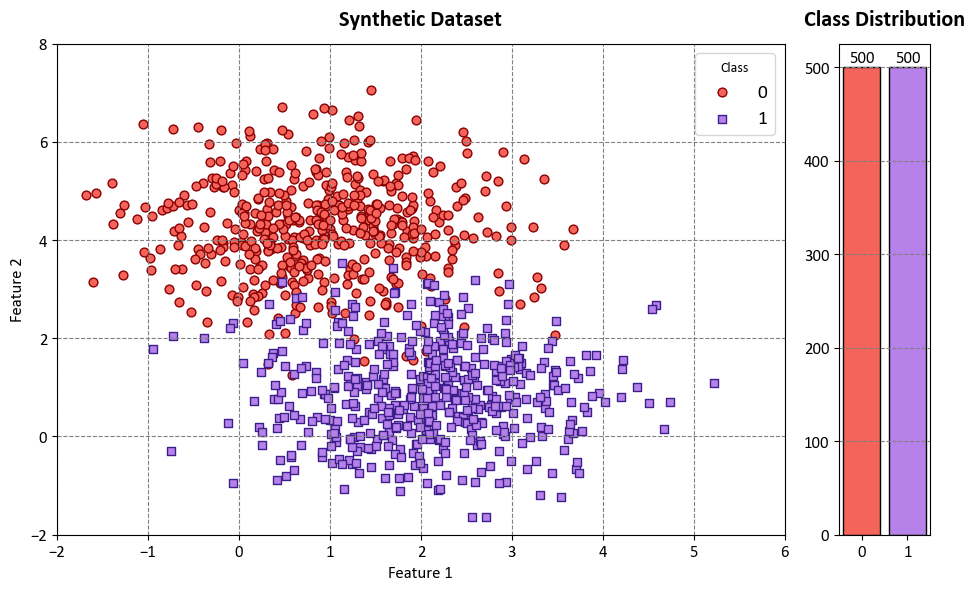

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from matplotlib.colors import ListedColormap

plt.style.use('../mystyle.mplstyle')

colors = ["#f5645a", "#b781ea"]
edge_colors = ['#8A0002', '#3C1F8B']
cmap_light = ListedColormap(['#f7dfdf', '#e3d3f2'])
markers = ['o', 's']

# Generate synthetic data
X, y = make_blobs(n_samples=1000, centers=2, random_state=0, cluster_std=1.0)

# Create a scatter plot using Matplotlib
fig, ax = plt.subplots(1, 2, figsize=(9.5, 6), gridspec_kw={'width_ratios': [8, 1]})

for num in np.unique(y):
    ax[0].scatter(X[:, 0][y == num], X[:, 1][y == num], c=colors[num],
               s=40, ec=edge_colors[num], marker=markers[num], label=str(num))

ax[0].grid(True)
ax[0].legend(title='Class', fontsize=14)
ax[0].set(xlim=[-2, 6], ylim=[-2, 8], xlabel='Feature 1', ylabel='Feature 2')
ax[0].set_title('Synthetic Dataset', weight = 'bold', fontsize = 16, y = 1.02)

bar_heights, bar_labels = np.unique(y, return_counts=True)
bars = ax[1].bar(bar_heights, bar_labels, color=colors, edgecolor='k')

# Add xticks with labels
ax[1].set_xticks(bar_heights)
ax[1].set_xticklabels([str(x) for x in np.unique(y)])

ax[1].grid(which='major', axis='x')
ax[1].set_title('Class Distribution', weight='bold', fontsize=16, y = 1.02)

# Add labels for bar heights inside each bar
for bar in bars:
    height = bar.get_height()
    ax[1].annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height),
                   xytext=(0, 3), textcoords='offset points', ha='center', fontsize=12)

plt.tight_layout()

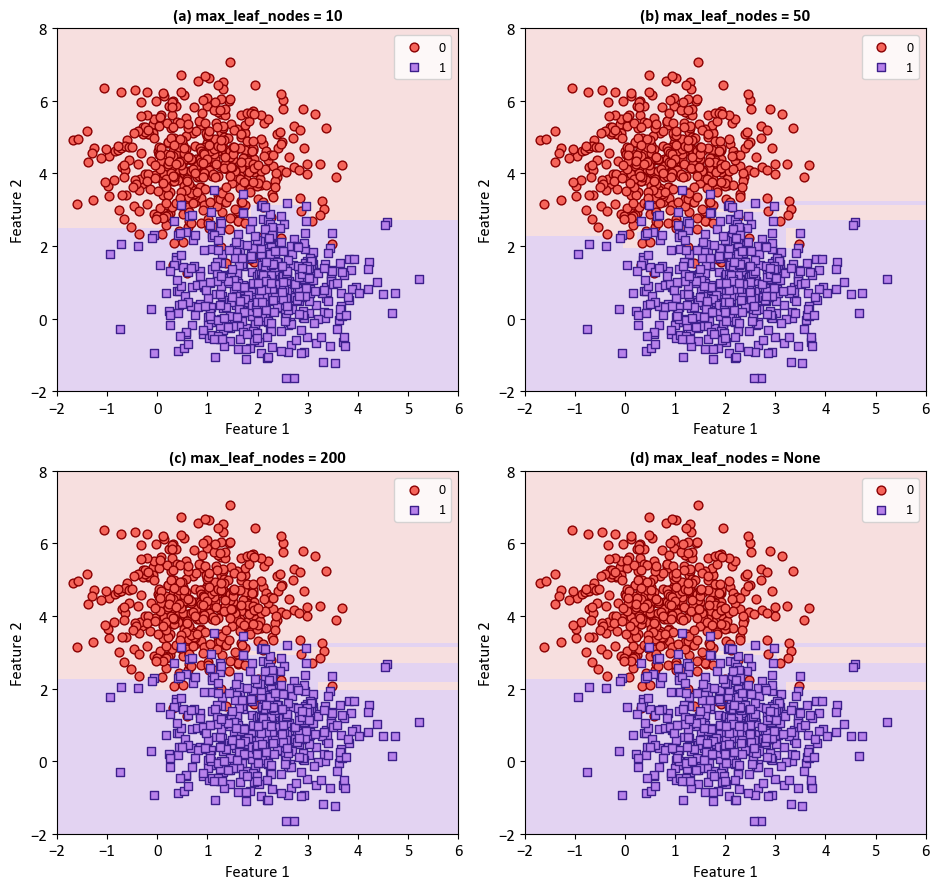

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay

# Plot decision boundaries
fig, axes = plt.subplots(2, 2, figsize=(9.5, 9))
axes = axes.ravel()
for i, (ax, m, alph) in enumerate(zip(axes, [10, 50, 200, None], 'abcd')):
    # Create DecisionTreeClassifier with specified parameters
    dts = DecisionTreeClassifier(criterion='gini', splitter='best', max_leaf_nodes=m)
    dts.fit(X, y)
    
    # Generate Decision Boundary Display
    display = DecisionBoundaryDisplay.from_estimator(dts, X=X, cmap=cmap_light, ax=ax,
                                                     response_method="predict",
                                                     plot_method="pcolormesh",
                                                     xlabel='Feature 1', ylabel='Feature 2',
                                                     shading="auto")
    
    # Scatter plot for each class
    for num in np.unique(y):
        ax.scatter(X[:, 0][y == num], X[:, 1][y == num], c=colors[num],
                   s=40, edgecolors=edge_colors[num], marker=markers[num], label=str(num))

    # Set axis limits, add legend, and set plot title
    ax.set(xlim=[-2, 6], ylim=[-2, 8])
    ax.legend()
    ax.set_title(f'({alph}) max_leaf_nodes = {m}', weight='bold')
    ax.grid(False)

# Ensure tight layout
plt.tight_layout()

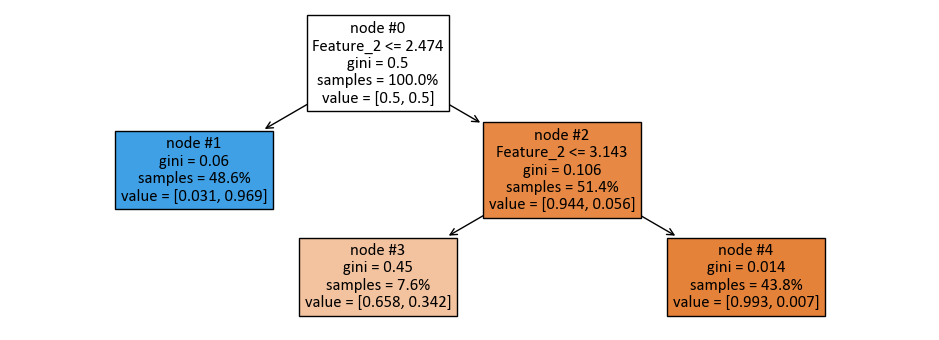

In [3]:
from sklearn import tree

# Instantiate DecisionTreeClassifier with specified parameters
dts = DecisionTreeClassifier(max_depth=None, max_leaf_nodes=3)
dts.fit(X, y)

# Define feature names for the tree plot
feature_names = [f'Feature_{i + 1}' for i in range(2)]

# Create a subplot for the tree plot
fig, ax = plt.subplots(1, 1, figsize=(9.5, 3.5))

# Plot the decision tree
_ = tree.plot_tree(dts, ax=ax,
                   filled=True,
                   node_ids=True,
                   feature_names=feature_names,
                   proportion=True,
                   fontsize=12)

# Ensure tight layout
plt.tight_layout()

In [4]:
print(tree.export_text(dts, feature_names = feature_names))

|--- Feature_2 <= 2.47
|   |--- class: 1
|--- Feature_2 >  2.47
|   |--- Feature_2 <= 3.14
|   |   |--- class: 0
|   |--- Feature_2 >  3.14
|   |   |--- class: 0



Here's the breakdown of the decision tree:

0. The top-level split is based on "Feature_2" with a threshold of 2.47. This means that the dataset is initially divided into two groups: one where "Feature_2" is less than or equal to 2.47 and another where it is greater than 2.47.

1. For the first group (Feature_2 <= 2.47), the model assigns the class label "1" to all instances in this subset. This means that when "Feature_2" falls below or equals 2.47, the model predicts the class label as "1" for those instances.

2. For the second group (Feature_2 > 2.47), further splitting is performed based on "Feature_2" again, but with a threshold of 3.14.

3. In the subset where "Feature_2" is less than or equal to 3.14, the model assigns the class label "0" to all instances in this subset. This means that when "Feature_2" is between 2.47 and 3.14, the model predicts the class label as "0" for those instances.

4. In the subset where "Feature_2" is greater than 3.14, the model also assigns the class label "0" to all instances in this subset. This means that when "Feature_2" exceeds 3.14, the model predicts the class label as "0" for those instances.

This decision tree classifier classifies instances based on the value of "Feature_2." If "Feature_2" is less than or equal to 2.47, it predicts class "1," and if "Feature_2" is greater than 2.47 but less than or equal to 3.14 or greater than 3.14, it predicts class "0." This tree structure provides a clear set of rules for classifying data points based on a single feature.

The following figure was generated utilizing  [dtreeviz](https://github.com/parrt/dtreeviz).

```{figure} dts_fig01.png
---
width: 600px
align: center
---
A visual representation of the above Decision Tree Classifier.
```
<!-- 
import dtreeviz

viz_model = dtreeviz.model(dts, X, y, feature_names = feature_names, target_name= 'Outcome')
v = viz_model.view(colors={'classes':[None, None, colors]})
v.show()
-->

## Synthetic Dataset with Three Classes

<font color='Blue'><b>Example</b></font>:  In this code example, we use a Decision Tree Classifier to illustrate decision boundaries on synthetic data. The synthetic dataset is generated using the `make_blobs` function from scikit-learn¹, which creates artificial datasets for various machine learning experiments. This particular dataset has the following characteristics:

- **Number of Samples:** 2000
- **Number of Features:** 2
- **Number of Classes:** 3
- **Random Seed (random_state):** 0
- **Cluster Standard Deviation (cluster_std):** 1.0

**Features:**
- The dataset contains 2000 data points, each described by two feature values. These features are labeled as 'Feature 1' and 'Feature 2'.

**Outcome (Target Variable):**
- The dataset also includes a target variable called 'Outcome.' This variable assigns each data point to one of three classes, labeled as 'Class 0,' 'Class 1,' and 'Class 2'.

**Colormap:**
- To facilitate class differentiation in the visualization, we use a vibrant colormap for the scatter plot. It displays three distinct colors: 'Red,' 'Blue,' and 'Green.'

The dataset simulates a scenario with three well-separated clusters, making it suitable for multi-class classification tasks. Each data point in this dataset belongs to one of the three classes, and it can be used to practice and evaluate machine learning algorithms that deal with multi-class classification problems.

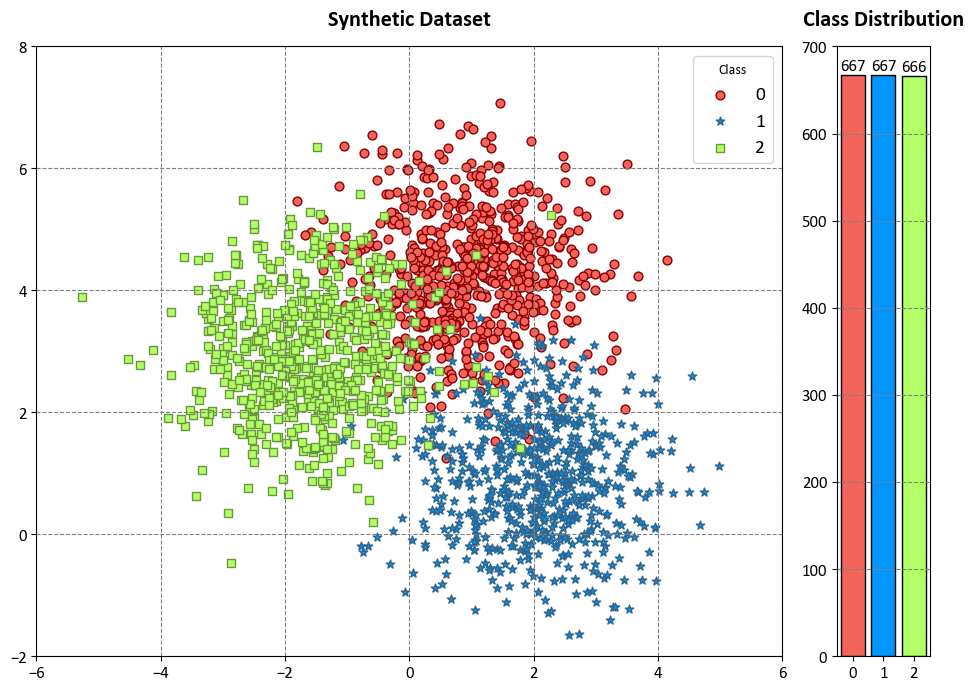

In [5]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

colors = ["#f5645a", "#0096ff", '#B2FF66']
edge_colors = ['#8A0002', '#2e658c', '#6A993D']
markers = ['o', '*', 's']
# Generate synthetic data
X, y = make_blobs(n_samples=2000, centers=3, random_state=0, cluster_std=1.0)

# Create a scatter plot using Seaborn
fig, ax = plt.subplots(1, 2, figsize=(9.5, 7), gridspec_kw={'width_ratios': [8, 1]})

for num in np.unique(y):
    ax[0].scatter(X[:, 0][y == num], X[:, 1][y == num], c=colors[num],
               s=40, ec=edge_colors[num], marker=markers[num], label=str(num))

ax[0].grid(True)
ax[0].legend(title='Class', fontsize=14)
ax[0].set(xlim = [-6, 6], ylim = [-2, 8])
ax[0].set_title('Synthetic Dataset', weight = 'bold', fontsize = 16, y = 1.02)

bar_heights, bar_labels = np.unique(y, return_counts=True)
bars = ax[1].bar(bar_heights, bar_labels, color=colors, edgecolor='k')

# Add xticks with labels
ax[1].set_xticks(bar_heights)
ax[1].set_xticklabels(['0', '1', '2'])

ax[1].grid(which='major', axis='x')
ax[1].set_title('Class Distribution', weight='bold', fontsize=16, y = 1.02)

# Add labels for bar heights inside each bar
for bar in bars:
    height = bar.get_height()
    ax[1].annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height),
                   xytext=(0, 3), textcoords='offset points', ha='center', fontsize=12)

plt.tight_layout()

The classifier is trained with varying levels of maximum leaf nodes (10, 50, 200, and None) to demonstrate the impact of this parameter on the decision boundaries. The resulting plots are organized in a 2x2 grid to allow easy comparison. The decision boundaries are displayed using a light colormap, while the scatterplot of the synthetic data is overlaid for context. The x and y axes are labeled as 'Feature 1' and 'Feature 2', respectively.

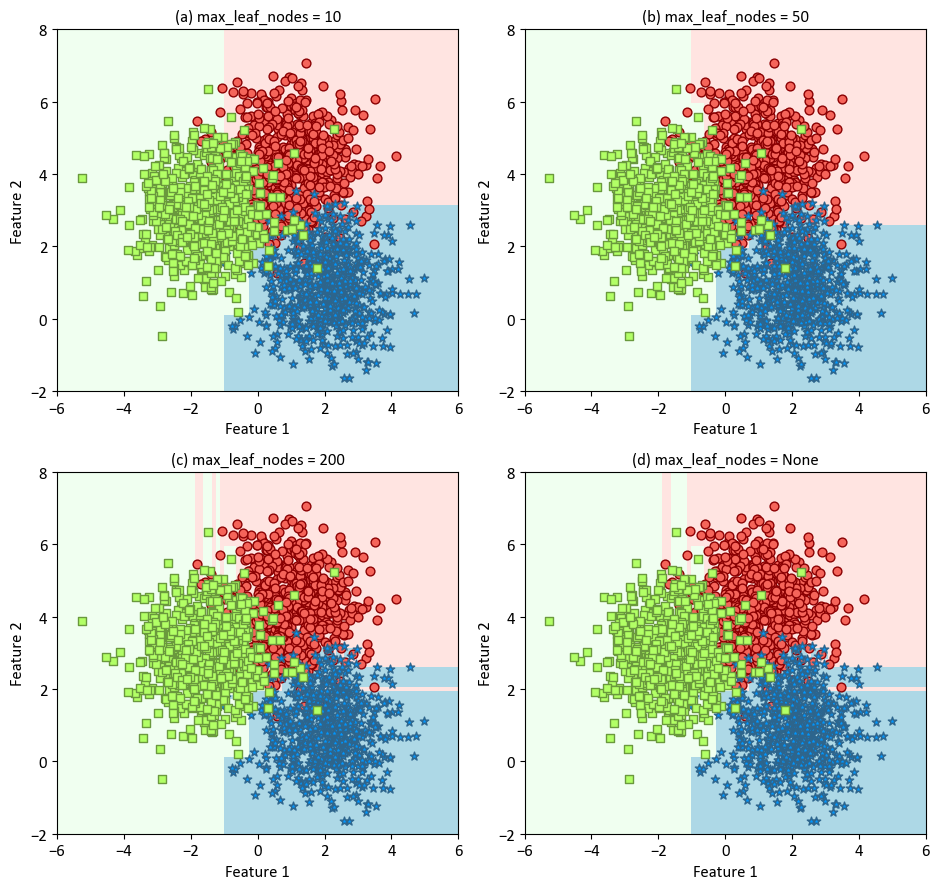

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay

cmap_light = ListedColormap(["MistyRose", "LightBlue", "HoneyDew"])

# Plot decision boundaries
fig, axes = plt.subplots(2, 2, figsize=(9.5, 9))
axes = axes.ravel()
for ax, m, alph in zip(axes, [10, 50, 200, None], 'abcd'):
    dts = DecisionTreeClassifier(criterion = 'gini', splitter = 'best', max_leaf_nodes = m)
    dts.fit(X, y)
    DecisionBoundaryDisplay.from_estimator(dts, X, cmap=cmap_light, ax=ax,
                                       response_method="predict",
                                       plot_method="pcolormesh",
                                       xlabel= 'Feature 1', ylabel='Feature 2',
                                       shading="auto")
    for num in np.unique(y):
        ax.scatter(X[:, 0][y == num], X[:, 1][y == num], c=colors[num],
                   s=40, ec=edge_colors[num], marker=markers[num], label=str(num))
    _ = ax.set(title = f'({alph}) max_leaf_nodes = {m}',  xlim = [-6, 6], ylim = [-2, 8])
    _ = ax.grid(False)
plt.tight_layout()

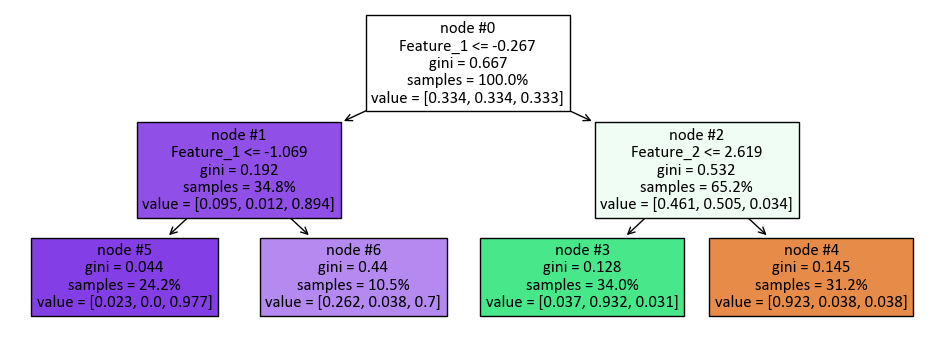

In [7]:
from sklearn import tree

dts = DecisionTreeClassifier(max_depth = None, max_leaf_nodes=4)
dts.fit(X, y)

feature_names = [f'Feature_{i + 1}' for i in range(2)]

fig, ax = plt.subplots(1, 1, figsize=(9.5, 3.5))
_ = tree.plot_tree(dts, ax = ax,
                   filled = True,
                   node_ids=True,
                   feature_names = feature_names,
                   proportion = True,
                   fontsize = 12)
plt.tight_layout()

In this code:

1. `max_depth=None`: The `max_depth` parameter determines the maximum depth of the decision tree. If set to `None`, the tree will expand until all leaves are pure (contain only one class) or until they have fewer samples than the minimum samples required for a leaf node split. A deeper tree can capture more complex relationships in the data, but it might also lead to overfitting.

1. `max_leaf_nodes=6`: This parameter restricts the maximum number of leaf nodes that the decision tree can have. Limiting the number of leaf nodes can help control the complexity of the tree and prevent overfitting. In this case, the tree is allowed to have up to 6 leaf nodes.

1. `max_features=6`: This parameter defines the maximum number of features that are considered when looking for the best split at each node. It's a way to control the randomness in the tree and potentially improve its generalization. Setting `max_features` to a specific number restricts the choice of features for each split. In this case, the model considers at most 6 features for each split.

In [8]:
print(tree.export_text(dts, feature_names = feature_names))

|--- Feature_1 <= -0.27
|   |--- Feature_1 <= -1.07
|   |   |--- class: 2
|   |--- Feature_1 >  -1.07
|   |   |--- class: 2
|--- Feature_1 >  -0.27
|   |--- Feature_2 <= 2.62
|   |   |--- class: 1
|   |--- Feature_2 >  2.62
|   |   |--- class: 0



Here's the breakdown of the decision tree:

1. The top-level split is based on "Feature_1" with a threshold of -0.27. This divides the dataset into two groups: instances where "Feature_1" is less than or equal to -0.27 and instances where it is greater than -0.27.

2. For the first group (Feature_1 <= -0.27), there is another split based on "Feature_1" with a threshold of -1.07.

   - If "Feature_1" is less than or equal to -1.07 in this subset, the model assigns the class label "2" to those instances.
   - If "Feature_1" is greater than -1.07 in this subset, the model also assigns the class label "2" to those instances.

3. For the second group (Feature_1 > -0.27), there is another split based on "Feature_2" with a threshold of 2.62.

   - If "Feature_2" is less than or equal to 2.62 in this subset, the model assigns the class label "1" to those instances.
   - If "Feature_2" is greater than 2.62 in this subset, the model assigns the class label "0" to those instances.

This decision tree classifier classifies instances based on the values of "Feature_1" and "Feature_2." If "Feature_1" is less than or equal to -0.27, it goes through a further split based on "Feature_1" again, with -1.07 as the threshold, and assigns class "2" to those instances. If "Feature_1" is greater than -0.27, it goes through a split based on "Feature_2" with a threshold of 2.62. If "Feature_2" is less than or equal to 2.62, it assigns class "1," and if "Feature_2" is greater than 2.62, it assigns class "0." This tree structure provides a set of decision rules for classifying data based on the values of these two features.

The following figure was produced using [dtreeviz](https://github.com/parrt/dtreeviz).

```{figure} dts_fig02.png
---
align: center
---
A visual representation of the above Decision Tree Classifier.
```

<!-- 
import dtreeviz

viz_model = dtreeviz.model(dts, X, y, feature_names = feature_names, target_name= 'Outcome')
v = viz_model.view(colors={'classes':[None, None, None, colors]})
v.show()
-->

## Optimizing DecisionTreeClassifier Parameters

<font color='Blue'><b>Example:</b></font> In our initial demonstration, we will use the previously synthesized dataset with three classes, employing the default settings of the DecisionTreeClassifier (DTS).

In [9]:
from sklearn.tree import DecisionTreeClassifier
from pprint import pprint

# Create a DecisionTreeClassifier instance
dts = DecisionTreeClassifier()

# Get the parameters of the DecisionTreeClassifier and print the parameters
pprint(dts.get_params())

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}


In [10]:
import numpy as np
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold

def print_bold(txt):
    _left = "\033[1;34m"
    _right = "\033[0m"
    print(_left + txt + _right)

def _Line(n = 80):
    print(n * '_')

# Create a DecisionTreeClassifier instance
dts = DecisionTreeClassifier()

# Initialize StratifiedKFold cross-validator
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
# The splitt would be 80-20!

# Lists to store train and test scores for each fold
train_acc_scores, test_acc_scores, train_f1_scores, test_f1_scores = [], [], [], []
train_class_proportions, test_class_proportions = [], []
   
# Perform Cross-Validation
for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    dts.fit(X_train, y_train)
    
    # Calculate class proportions for train and test sets
    train_class_proportions.append([np.mean(y_train == dts) for dts in np.unique(y)])
    test_class_proportions.append([np.mean(y_test == dts) for dts in np.unique(y)])
    
    # train
    y_train_pred = dts.predict(X_train)
    train_acc_scores.append(metrics.accuracy_score(y_train, y_train_pred))
    train_f1_scores.append(metrics.f1_score(y_train, y_train_pred, average = 'weighted'))
    
    # test
    y_test_pred = dts.predict(X_test)
    test_acc_scores.append(metrics.accuracy_score(y_test, y_test_pred))
    test_f1_scores.append(metrics.f1_score(y_test, y_test_pred, average = 'weighted'))

_Line()
#  Print the Train and Test Scores for each fold
for fold in range(n_splits):
    print_bold(f'Fold {fold + 1}:')
    print(f"\tTrain Class Proportions: {train_class_proportions[fold]}*{len(y_train)}")
    print(f"\tTest Class Proportions: {test_class_proportions[fold]}*{len(y_test)}")
    print(f"\tTrain Accuracy Score = {train_acc_scores[fold]:.4f}, Test Accuracy Score = {test_acc_scores[fold]:.4f}")
    print(f"\tTrain F1 Score (weighted) = {train_f1_scores[fold]:.4f}, Test F1 Score (weighted)= {test_f1_scores[fold]:.4f}")

_Line()
print_bold('Accuracy Score:')
print(f"\tMean Train Accuracy Score: {np.mean(train_acc_scores):.4f} ± {np.std(train_acc_scores):.4f}")
print(f"\tMean Test Accuracy Score: {np.mean(test_acc_scores):.4f} ± {np.std(test_acc_scores):.4f}")
print_bold('F1 Score:')
print(f"\tMean F1 Accuracy Score (weighted): {np.mean(train_f1_scores):.4f} ± {np.std(train_f1_scores):.4f}")
print(f"\tMean F1 Accuracy Score (weighted): {np.mean(test_f1_scores):.4f} ± {np.std(test_f1_scores):.4f}")
_Line()

________________________________________________________________________________
Fold 1:
	Train Class Proportions: [0.33375, 0.33375, 0.3325]*1600
	Test Class Proportions: [0.3325, 0.3325, 0.335]*400
	Train Accuracy Score = 1.0000, Test Accuracy Score = 0.8850
	Train F1 Score (weighted) = 1.0000, Test F1 Score (weighted)= 0.8854
Fold 2:
	Train Class Proportions: [0.333125, 0.33375, 0.333125]*1600
	Test Class Proportions: [0.335, 0.3325, 0.3325]*400
	Train Accuracy Score = 1.0000, Test Accuracy Score = 0.8900
	Train F1 Score (weighted) = 1.0000, Test F1 Score (weighted)= 0.8903
Fold 3:
	Train Class Proportions: [0.333125, 0.33375, 0.333125]*1600
	Test Class Proportions: [0.335, 0.3325, 0.3325]*400
	Train Accuracy Score = 1.0000, Test Accuracy Score = 0.8925
	Train F1 Score (weighted) = 1.0000, Test F1 Score (weighted)= 0.8923
Fold 4:
	Train Class Proportions: [0.33375, 0.333125, 0.333125]*1600
	Test Class Proportions: [0.3325, 0.335, 0.3325]*400
	Train Accuracy Score = 1.0000, Test Accu

In looking at the results, we need to think about a few important things:

1. **Difference between train and test scores:** The model does really well with the training data, getting perfect scores of 1.0000. However, the test scores, although high, are noticeably different from the training scores. This suggests that the model, while fitting perfectly to the training data, might not be as smooth when dealing with new datasets, hinting at a potential issue of overfitting.

2. **Variation of test scores across folds:** This tells us how consistent the model is across different data groupings. The low standard deviation of 0.0144 for both accuracy and F1 score indicates that the model performs consistently well across different folds. This means it stays stable even when the data is split in various ways.

3. **Proportions of classes in train and test sets:** Checking how balanced the data is in terms of class distribution, we see similar proportions in both the train and test sets and across folds. This suggests a balanced dataset, meaning there's no bias towards any specific class. This balance gives us confidence in the reliability of the model's performance metrics.

The results suggest the model is good at making accurate and reliable predictions on new data. However, the noticeable difference between train and test scores raises concerns about potential overfitting. To address this, it might be worth looking into methods like regularization or trying simpler models.

`````{admonition} Note
:class: warning

Optimizing and identifying the best results is not the goal of the final example.

`````

<font color='Blue'><b>Example:</b></font> We will work with the previously generated synthetic dataset. However, we will introduce some modifications to the default settings of the DecisionTreeClassifier (DTS).

In [11]:
from sklearn.tree import DecisionTreeClassifier
from pprint import pprint

# Create a DecisionTreeClassifier instance
dts = DecisionTreeClassifier(max_depth = None, max_leaf_nodes=6, max_features=6)

# Get the parameters of the DecisionTreeClassifier and print the parameters
pprint(dts.get_params())

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 6,
 'max_leaf_nodes': 6,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}


In [12]:
import numpy as np
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold

def print_bold(txt):
    _left = "\033[1;34m"
    _right = "\033[0m"
    print(_left + txt + _right)

def _Line(n = 80):
    print(n * '_')

# Create a DecisionTreeClassifier instance
dts = DecisionTreeClassifier(max_depth = None, max_leaf_nodes=6, max_features=6)

# Initialize StratifiedKFold cross-validator
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
# The splitt would be 80-20!

# Lists to store train and test scores for each fold
train_acc_scores, test_acc_scores, train_f1_scores, test_f1_scores = [], [], [], []
train_class_proportions, test_class_proportions = [], []
   
# Perform Cross-Validation
for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    dts.fit(X_train, y_train)
    
    # Calculate class proportions for train and test sets
    train_class_proportions.append([np.mean(y_train == dts) for dts in np.unique(y)])
    test_class_proportions.append([np.mean(y_test == dts) for dts in np.unique(y)])
    
    # train
    y_train_pred = dts.predict(X_train)
    train_acc_scores.append(metrics.accuracy_score(y_train, y_train_pred))
    train_f1_scores.append(metrics.f1_score(y_train, y_train_pred, average = 'weighted'))
    
    # test
    y_test_pred = dts.predict(X_test)
    test_acc_scores.append(metrics.accuracy_score(y_test, y_test_pred))
    test_f1_scores.append(metrics.f1_score(y_test, y_test_pred, average = 'weighted'))

_Line()
#  Print the Train and Test Scores for each fold
for fold in range(n_splits):
    print_bold(f'Fold {fold + 1}:')
    print(f"\tTrain Class Proportions: {train_class_proportions[fold]}*{len(y_train)}")
    print(f"\tTest Class Proportions: {test_class_proportions[fold]}*{len(y_test)}")
    print(f"\tTrain Accuracy Score = {train_acc_scores[fold]:.4f}, Test Accuracy Score = {test_acc_scores[fold]:.4f}")
    print(f"\tTrain F1 Score (weighted) = {train_f1_scores[fold]:.4f}, Test F1 Score (weighted)= {test_f1_scores[fold]:.4f}")

_Line()
print_bold('Accuracy Score:')
print(f"\tMean Train Accuracy Score: {np.mean(train_acc_scores):.4f} ± {np.std(train_acc_scores):.4f}")
print(f"\tMean Test Accuracy Score: {np.mean(test_acc_scores):.4f} ± {np.std(test_acc_scores):.4f}")
print_bold('F1 Score:')
print(f"\tMean F1 Accuracy Score (weighted): {np.mean(train_f1_scores):.4f} ± {np.std(train_f1_scores):.4f}")
print(f"\tMean F1 Accuracy Score (weighted): {np.mean(test_f1_scores):.4f} ± {np.std(test_f1_scores):.4f}")
_Line()

________________________________________________________________________________
Fold 1:
	Train Class Proportions: [0.33375, 0.33375, 0.3325]*1600
	Test Class Proportions: [0.3325, 0.3325, 0.335]*400
	Train Accuracy Score = 0.9206, Test Accuracy Score = 0.8925
	Train F1 Score (weighted) = 0.9210, Test F1 Score (weighted)= 0.8930
Fold 2:
	Train Class Proportions: [0.333125, 0.33375, 0.333125]*1600
	Test Class Proportions: [0.335, 0.3325, 0.3325]*400
	Train Accuracy Score = 0.9250, Test Accuracy Score = 0.9175
	Train F1 Score (weighted) = 0.9246, Test F1 Score (weighted)= 0.9168
Fold 3:
	Train Class Proportions: [0.333125, 0.33375, 0.333125]*1600
	Test Class Proportions: [0.335, 0.3325, 0.3325]*400
	Train Accuracy Score = 0.9244, Test Accuracy Score = 0.9150
	Train F1 Score (weighted) = 0.9241, Test F1 Score (weighted)= 0.9144
Fold 4:
	Train Class Proportions: [0.33375, 0.333125, 0.333125]*1600
	Test Class Proportions: [0.3325, 0.335, 0.3325]*400
	Train Accuracy Score = 0.9219, Test Accu

The results stem from a 5-fold cross-validation, where each fold comprises 1600 training samples and 400 test samples. Notably, the class proportions remain approximately balanced across folds, indicating an absence of skewness towards any specific class. The accuracy score, denoting the fraction of correctly predicted samples, and the F1 score, representing the harmonic mean of precision and recall, weighted by the sample count in each class, provide insights into the model's performance2.

The mean train accuracy score, standing at 0.9220, signifies that, on average, the model accurately predicts about 92% of the training samples. Correspondingly, the mean test accuracy score, at 0.9125, indicates an average correct prediction rate of approximately 91% for the test samples. The mean train F1 score registers at 0.9219, while the mean test F1 score is 0.9122—both closely aligned with their accuracy counterparts. This alignment suggests a well-balanced interplay between precision and recall for each class within the model.

In assessing variability across folds, the reported standard deviations offer insights. The notably low standard deviations for train scores (0.0025 and 0.0023) indicate consistent model performance across distinct training folds. Conversely, the higher standard deviations for test scores (0.0133 and 0.0131) suggest more varied model performance across different test folds. This variability may stem from data or model randomness or the limited size of the test folds.

The cross-validation results underscore the model's commendable accuracy and F1 scores on both training and test data, signaling a lack of overfitting or underfitting. Nonetheless, the observed variability in test fold performance suggests room for improvement, potentially through enlarging test folds or exploring alternative models. Additionally, visualizing data and model predictions could provide valuable insights into the model's fit with the data.

`````{admonition} Note
:class: warning

Optimizing and identifying the best results is not the goal of the final example.

`````

`````{admonition} Remark
:class: important

To improve the accuracy results of your Decision Tree Classifier, we can try the following strategies:

1. **Hyperparameter Tuning:** Experiment with different hyperparameters of the DecisionTreeClassifier to find the combination that gives the best results. You can use techniques like GridSearchCV or RandomizedSearchCV to systematically search through a range of hyperparameter values. Some of the hyperparameters you may want to adjust are `max_depth`, `min_samples_split`, `min_samples_leaf`, and `criterion` {cite:p}`sklearnUserGuide`.
2. **Feature Engineering:** Carefully select and engineer your features. Sometimes, adding relevant features or transforming existing ones can improve the model's performance.
3. **Ensemble Methods:** Consider using ensemble methods like Random Forests or Gradient Boosting. These methods combine multiple base learners, which can be decision trees or other types of models, to improve overall performance and reduce overfitting {cite:p}`james2023introduction`.
4. **Data Preprocessing:** Ensure your data is properly preprocessed. This includes handling missing values, scaling or normalizing numerical features, and encoding categorical variables correctly.
5. **Handling Imbalanced Data:** If your classes are imbalanced, techniques like oversampling, undersampling, or using specialized sampling techniques like SMOTE (Synthetic Minority Over-sampling Technique) can help balance the class distribution {cite:p}`chawla2002smote`.
6. **Cross-Validation Strategies:** Try different cross-validation strategies such as stratified k-fold or leave-one-out cross-validation. These strategies can help ensure that each fold represents the data distribution more accurately {cite:p}`kohavi1995study`.
7. **Different Algorithms:** While Decision Trees can be powerful, other algorithms like Support Vector Machines, Neural Networks, or K-Nearest Neighbors might perform better for certain datasets or problems. You can compare the results of different algorithms using metrics like accuracy, precision, recall, or F1-score {cite:p}`géron2022hands`.

Remember that improving accuracy might require experimentation and domain knowledge to find the best strategies for your specific dataset and problem.

`````

## GridSearchCV 

`GridSearchCV` is a method provided by the scikit-learn library in Python that performs **hyperparameter tuning** for machine learning models. Hyperparameters are parameters that are set before the training process begins and cannot be learned from the data. They significantly impact the performance and behavior of a machine learning model. `GridSearchCV` is a technique used to systematically search through a predefined set of hyperparameter values to find the combination that results in the best model performance {cite:p}`pedregosa2011scikit,sklearnUserGuide`.

Here's how `GridSearchCV` works:
1. **Select Model and Hyperparameters:** You first choose the machine learning algorithm you want to use (e.g., Decision Tree, Random Forest, Support Vector Machine, etc.) and determine the hyperparameters associated with that algorithm that you want to tune. For example, for a Decision Tree, you may want to tune the maximum depth, the minimum number of samples per leaf, or the splitting criterion.

2. **Define Parameter Grid:** You create a dictionary where the keys are the names of the hyperparameters you want to tune, and the values are lists of possible values for those hyperparameters. This forms a grid of all possible combinations. For example, for a Decision Tree, you may define the parameter grid as follows:

    ```python
    param_grid = {'max_depth': [3, 5, 7, 9],
                  'min_samples_leaf': [1, 2, 4, 8],
                  'criterion': ['gini', 'entropy']}
    ```

3. **Cross-Validation:** `GridSearchCV` uses cross-validation to evaluate the performance of each combination of hyperparameters. Cross-validation involves splitting your dataset into multiple subsets (folds), training the model on a subset of the data, and validating it on the remaining subset. This process is repeated for each fold, and the results are averaged to provide a more robust evaluation. For example, you may use a 5-fold cross-validation, which means that your dataset is divided into 5 parts, and each part is used as a validation set once, while the other 4 parts are used as a training set.

4. **Evaluation:** For each combination of hyperparameters, `GridSearchCV` trains the model using cross-validation and calculates a performance metric (such as accuracy, F1-score, etc.) for each fold. The average performance across all folds is then used as the evaluation metric for that combination. For example, you may use accuracy as the performance metric, which means that you measure how many predictions are correct out of the total number of predictions.

5. **Best Hyperparameters:** After evaluating all combinations, `GridSearchCV` identifies the combination of hyperparameters that resulted in the best performance metric. For example, you may find that the best combination of hyperparameters for a Decision Tree is:

    ```python
    best_params = {'max_depth': 7,
                   'min_samples_leaf': 2,
                   'criterion': 'gini'}
    ```

6. **Retrain and Test:** Once the best hyperparameters are found, you can retrain your model using the entire training dataset and these optimized hyperparameters. Then, you can test the final model on an independent test dataset to assess its generalization performance. For example, you may use a separate test set that was not used during the cross-validation process, and measure the accuracy of the final model on this test set.

***

In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Define the hyperparameters to tune
param_grid = dict(criterion = ['gini', 'log_loss'],
                  max_depth = [None, 10, 15, 20, 30],
                  min_samples_split = [2, 3, 4, 5, 10],
                  min_samples_leaf = [1, 2, 4, 5, 10],
                  random_state = [0])

# Create a custom scoring function for F1 score in a multiclass setting
scoring = metrics.make_scorer(metrics.f1_score, average='weighted')

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(),
                           param_grid=param_grid,
                           scoring=scoring,
                           cv=5)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Evaluate the model on the test set
test_score = grid_search.score(X_test, y_test)

# Access the best parameters found during GridSearchCV
best_params = grid_search.best_params_

# Access the best estimator (model)
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)
print(f"Best Score: {grid_search.best_score_:.4f}")
print(f'Test Score: {test_score:.4f}')

Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 2, 'random_state': 0}
Best Score: 0.9168
Test Score: 0.9322


The `param_grid` is a dictionary specifying the hyperparameters and the corresponding values that the `GridSearchCV` will explore to find the best combination for the given estimator (in this case, a `DecisionTreeClassifier`). Let's break down the `param_grid` in your code:

```python
param_grid = {'criterion': ['gini', 'log_loss'],
              'max_depth': [None, 10, 15, 20, 30],
              'min_samples_split': [2, 3, 4, 5, 10],
              'min_samples_leaf': [1, 2, 4, 5, 10],
              'random_state': [0]}
```

1. `'criterion'`: This hyperparameter determines the function used to measure the quality of a split. It takes values 'gini' or 'entropy'. The grid search will try both to find which one results in better performance.

2. `'splitter'`: This hyperparameter specifies the strategy used to choose the split at each node. It can be either 'best' or 'random'. The grid search will explore both options.

3. `'max_depth'`: This hyperparameter represents the maximum depth of the tree. It takes values None (unlimited depth) or specific integers (depth limits). The grid search will try different depth values.

4. `'min_samples_split'`: This hyperparameter represents the minimum number of samples required to split an internal node. It takes integer values. The grid search will try different values.

5. `'min_samples_leaf'`: This hyperparameter represents the minimum number of samples required to be at a leaf node. It takes integer values. The grid search will try different values.

The `GridSearchCV` will perform a cross-validated search over the specified parameter values and select the combination that gives the best performance according to the scoring metric specified. In your case, the scoring metric is the F1 score with the 'weighted' averaging strategy for the multiclass classification problem.

Now, with the above parameters, we have,

In [32]:
import numpy as np
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold

def print_bold(txt):
    _left = "\033[1;34m"
    _right = "\033[0m"
    print(_left + txt + _right)

def _Line(n = 80):
    print(n * '_')

# Create a DecisionTreeClassifier instance
dts = DecisionTreeClassifier(**best_params)

# Initialize StratifiedKFold cross-validator
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
# The splitt would be 80-20!

# Lists to store train and test scores for each fold
train_acc_scores, test_acc_scores, train_f1_scores, test_f1_scores = [], [], [], []
train_class_proportions, test_class_proportions = [], []
   
# Perform Cross-Validation
for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    dts.fit(X_train, y_train)
    
    # Calculate class proportions for train and test sets
    train_class_proportions.append([np.mean(y_train == dts) for dts in np.unique(y)])
    test_class_proportions.append([np.mean(y_test == dts) for dts in np.unique(y)])
    
    # train
    y_train_pred = dts.predict(X_train)
    train_acc_scores.append(metrics.accuracy_score(y_train, y_train_pred))
    train_f1_scores.append(metrics.f1_score(y_train, y_train_pred, average = 'weighted'))
    
    # test
    y_test_pred = dts.predict(X_test)
    test_acc_scores.append(metrics.accuracy_score(y_test, y_test_pred))
    test_f1_scores.append(metrics.f1_score(y_test, y_test_pred, average = 'weighted'))

_Line()
#  Print the Train and Test Scores for each fold
for fold in range(n_splits):
    print_bold(f'Fold {fold + 1}:')
    print(f"\tTrain Class Proportions: {train_class_proportions[fold]}*{len(y_train)}")
    print(f"\tTest Class Proportions: {test_class_proportions[fold]}*{len(y_test)}")
    print(f"\tTrain Accuracy Score = {train_acc_scores[fold]:.4f}, Test Accuracy Score = {test_acc_scores[fold]:.4f}")
    print(f"\tTrain F1 Score (weighted) = {train_f1_scores[fold]:.4f}, Test F1 Score (weighted)= {test_f1_scores[fold]:.4f}")

_Line()
print_bold('Accuracy Score:')
print(f"\tMean Train Accuracy Score: {np.mean(train_acc_scores):.4f} ± {np.std(train_acc_scores):.4f}")
print(f"\tMean Test Accuracy Score: {np.mean(test_acc_scores):.4f} ± {np.std(test_acc_scores):.4f}")
print_bold('F1 Score:')
print(f"\tMean F1 Accuracy Score (weighted): {np.mean(train_f1_scores):.4f} ± {np.std(train_f1_scores):.4f}")
print(f"\tMean F1 Accuracy Score (weighted): {np.mean(test_f1_scores):.4f} ± {np.std(test_f1_scores):.4f}")
_Line()

________________________________________________________________________________
Fold 1:
	Train Class Proportions: [0.33375, 0.33375, 0.3325]*1600
	Test Class Proportions: [0.3325, 0.3325, 0.335]*400
	Train Accuracy Score = 0.9387, Test Accuracy Score = 0.9250
	Train F1 Score (weighted) = 0.9388, Test F1 Score (weighted)= 0.9244
Fold 2:
	Train Class Proportions: [0.333125, 0.33375, 0.333125]*1600
	Test Class Proportions: [0.335, 0.3325, 0.3325]*400
	Train Accuracy Score = 0.9394, Test Accuracy Score = 0.9100
	Train F1 Score (weighted) = 0.9393, Test F1 Score (weighted)= 0.9096
Fold 3:
	Train Class Proportions: [0.333125, 0.33375, 0.333125]*1600
	Test Class Proportions: [0.335, 0.3325, 0.3325]*400
	Train Accuracy Score = 0.9375, Test Accuracy Score = 0.9250
	Train F1 Score (weighted) = 0.9373, Test F1 Score (weighted)= 0.9247
Fold 4:
	Train Class Proportions: [0.33375, 0.333125, 0.333125]*1600
	Test Class Proportions: [0.3325, 0.335, 0.3325]*400
	Train Accuracy Score = 0.9431, Test Accu

The tree for the above model can be represented as follows.

In [33]:
print(tree.export_text(dts, feature_names =[f'Feature_{i + 1}' for i in range(2)]))

|--- Feature_1 <= -0.27
|   |--- Feature_1 <= -1.07
|   |   |--- Feature_2 <= 4.87
|   |   |   |--- Feature_2 <= 4.30
|   |   |   |   |--- Feature_1 <= -1.61
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- Feature_1 >  -1.61
|   |   |   |   |   |--- Feature_2 <= 3.14
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- Feature_2 >  3.14
|   |   |   |   |   |   |--- Feature_2 <= 3.45
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |--- Feature_2 >  3.45
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |--- Feature_2 >  4.30
|   |   |   |   |--- Feature_1 <= -1.40
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- Feature_1 >  -1.40
|   |   |   |   |   |--- class: 2
|   |   |--- Feature_2 >  4.87
|   |   |   |--- class: 2
|   |--- Feature_1 >  -1.07
|   |   |--- Feature_2 <= 3.71
|   |   |   |--- Feature_2 <= 1.28
|   |   |   |   |--- class: 2
|   |   |   |--- Feature_2 >  1.28
|   |   |   |   |--- Feature_2 <= 2.95
|   |   |   |   |   |--- Fea